# Machine Learning: Model 2



## K Nearest Neighbors

### Importing Dependencies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

### Read CSV and perform data cleaning

In [21]:
df = pd.read_csv("./Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


* Let's review correlation coefficients among variables

In [22]:
df.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.056111,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.056111,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119


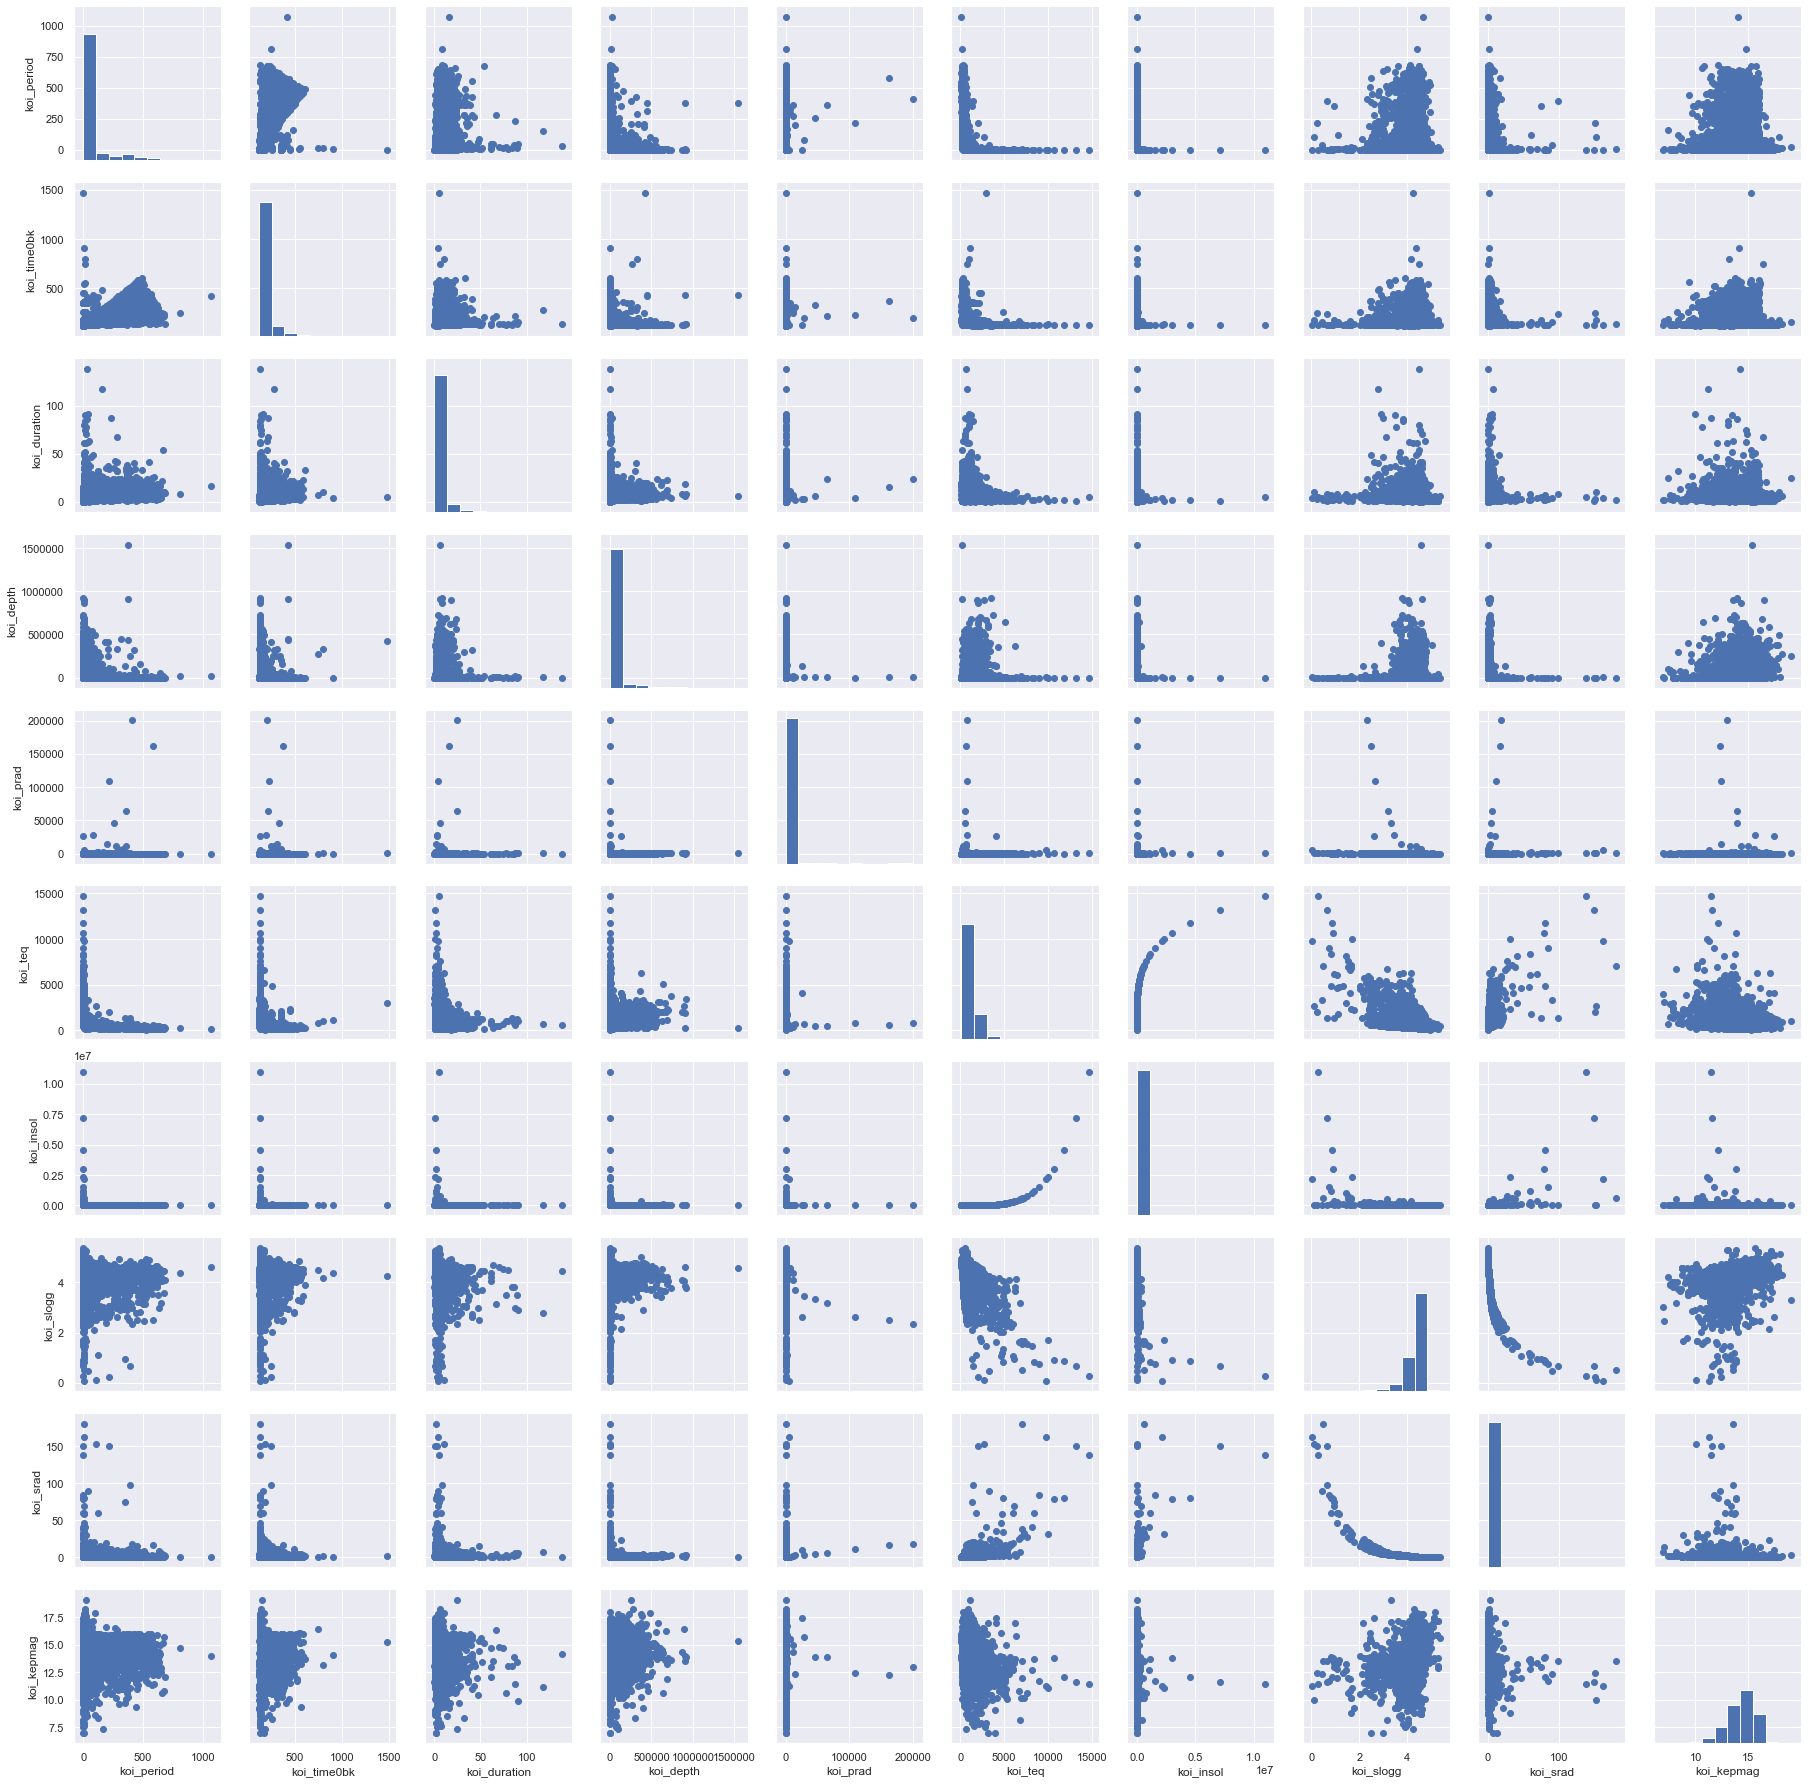

In [23]:
# Use Pair Plot to visualize the correlation between the variables in the study

pairplot = df[['koi_period', 'koi_time0bk','koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

plot = sns.PairGrid(pairplot)
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)

### Select our features

In [24]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']]
X = selected_features

In [25]:
y_string = df[['koi_disposition']]
y_string

,koi_disposition
0,CONFIRMED
1,FALSE POSITIVE
2,FALSE POSITIVE
3,CONFIRMED
4,CONFIRMED
...,...
6986,FALSE POSITIVE
6987,FALSE POSITIVE
6988,CANDIDATE
6989,FALSE POSITIVE


In [26]:
y_string["koi_disposition"].replace({"CONFIRMED": "0", "FALSE POSITIVE": "1", "CANDIDATE": "2"}, inplace=True)
y_string.head()
y_string.dtypes

C:\Users\marib\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,koi_disposition
0,0
1,1
2,1
3,0
4,0


koi_disposition    object
dtype: object

In [27]:
y = y_string.astype('int')
y

,koi_disposition
0,0
1,1
2,1
3,0
4,0
...,...
6986,1
6987,1
6988,2
6989,1


### Train test split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42, stratify = y)

In [29]:
X.shape
X_train.shape
X_test.shape
y.shape
y_train.shape
y_test.shape

(6991, 8)

(5942, 8)

(1049, 8)

(6991, 1)

(5942, 1)

(1049, 1)

### Pre-processing

* Scale the data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled[0:10]
X_test_scaled[0:10]

array([[2.63740610e-02, 4.44956747e-02, 4.85470119e-04, 1.20291979e-05,
        3.17667238e-02, 2.04703251e-06, 8.43896934e-01, 4.23003380e-03],
       [1.28505894e-02, 5.72307459e-02, 1.30242622e-02, 7.38223390e-05,
        4.92624357e-02, 9.30801484e-06, 8.18882829e-01, 5.23056741e-03],
       [1.70119516e-01, 1.84573580e-02, 1.14506850e-04, 5.59033264e-06,
        1.64665523e-02, 2.62159005e-07, 8.34305059e-01, 4.54686944e-03],
       [1.08379367e-01, 4.95616919e-02, 1.02426864e-03, 1.55730695e-05,
        1.58490566e-02, 2.34755624e-07, 8.43708858e-01, 4.03548559e-03],
       [5.52614779e-03, 2.23533493e-02, 6.12433238e-05, 5.39067790e-06,
        6.79245283e-02, 2.96568516e-05, 8.04024826e-01, 5.51405194e-03],
       [1.17075781e-02, 4.50521417e-02, 2.13508240e-04, 1.36763495e-05,
        5.59862779e-02, 1.46434530e-05, 7.65093098e-01, 7.45953397e-03],
       [2.42145676e-03, 9.38044272e-03, 1.74906781e-04, 6.08946948e-06,
        6.33962264e-02, 2.29960033e-05, 8.51796126e-01, 3.

array([[1.45113679e-02, 4.48646051e-02, 2.43529795e-02, 7.72164696e-05,
        3.58147513e-02, 3.06735170e-06, 8.53864961e-01, 3.77979367e-03],
       [6.28751400e-03, 1.52504463e-01, 1.89212027e-03, 5.04178125e-04,
        1.03807890e-01, 1.43327900e-04, 7.06413391e-01, 1.31069904e-02],
       [1.32646350e-03, 3.82141025e-02, 1.79864960e-01, 5.09968112e-04,
        1.44837050e-01, 5.08309868e-04, 7.70735377e-01, 8.44895055e-03],
       [9.19530187e-03, 2.64574736e-02, 1.86454780e-04, 9.18411790e-06,
        5.39965695e-02, 1.28549257e-05, 7.92364115e-01, 5.91982391e-03],
       [2.39051692e-02, 5.50179587e-02, 7.49322447e-05, 4.89154106e-06,
        3.57461407e-02, 3.04634244e-06, 8.42016175e-01, 4.30785308e-03],
       [5.30111607e-03, 3.45948993e-02, 9.70550979e-05, 5.14110948e-06,
        5.85248714e-02, 1.72084094e-05, 8.23584728e-01, 4.52463536e-03],
       [2.20932045e-02, 3.61848048e-02, 9.78336147e-05, 1.43252274e-05,
        6.36706690e-02, 2.33504203e-05, 7.49294715e-01, 1.

In [33]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Train the Model: K Nearest Neighbors

In [40]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

for k in range(1, 250, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}/{train_score-test_score:.4f}")

KNeighborsClassifier(n_neighbors=1)

k: 1, Train/Test Score: 1.000/0.579/0.4214


KNeighborsClassifier(n_neighbors=3)

k: 3, Train/Test Score: 0.765/0.588/0.1772


KNeighborsClassifier()

k: 5, Train/Test Score: 0.723/0.613/0.1100


KNeighborsClassifier(n_neighbors=7)

k: 7, Train/Test Score: 0.708/0.619/0.0895


KNeighborsClassifier(n_neighbors=9)

k: 9, Train/Test Score: 0.702/0.636/0.0663


KNeighborsClassifier(n_neighbors=11)

k: 11, Train/Test Score: 0.690/0.630/0.0600


KNeighborsClassifier(n_neighbors=13)

k: 13, Train/Test Score: 0.680/0.627/0.0531


KNeighborsClassifier(n_neighbors=15)

k: 15, Train/Test Score: 0.686/0.633/0.0530


KNeighborsClassifier(n_neighbors=17)

k: 17, Train/Test Score: 0.676/0.644/0.0319


KNeighborsClassifier(n_neighbors=19)

k: 19, Train/Test Score: 0.679/0.637/0.0423


KNeighborsClassifier(n_neighbors=21)

k: 21, Train/Test Score: 0.675/0.634/0.0409


KNeighborsClassifier(n_neighbors=23)

k: 23, Train/Test Score: 0.672/0.643/0.0284


KNeighborsClassifier(n_neighbors=25)

k: 25, Train/Test Score: 0.670/0.647/0.0229


KNeighborsClassifier(n_neighbors=27)

k: 27, Train/Test Score: 0.671/0.638/0.0331


KNeighborsClassifier(n_neighbors=29)

k: 29, Train/Test Score: 0.668/0.637/0.0313


KNeighborsClassifier(n_neighbors=31)

k: 31, Train/Test Score: 0.668/0.638/0.0304


KNeighborsClassifier(n_neighbors=33)

k: 33, Train/Test Score: 0.664/0.634/0.0303


KNeighborsClassifier(n_neighbors=35)

k: 35, Train/Test Score: 0.663/0.626/0.0368


KNeighborsClassifier(n_neighbors=37)

k: 37, Train/Test Score: 0.660/0.632/0.0277


KNeighborsClassifier(n_neighbors=39)

k: 39, Train/Test Score: 0.661/0.632/0.0289


KNeighborsClassifier(n_neighbors=41)

k: 41, Train/Test Score: 0.664/0.632/0.0316


KNeighborsClassifier(n_neighbors=43)

k: 43, Train/Test Score: 0.661/0.633/0.0282


KNeighborsClassifier(n_neighbors=45)

k: 45, Train/Test Score: 0.660/0.629/0.0310


KNeighborsClassifier(n_neighbors=47)

k: 47, Train/Test Score: 0.659/0.623/0.0351


KNeighborsClassifier(n_neighbors=49)

k: 49, Train/Test Score: 0.656/0.628/0.0281


KNeighborsClassifier(n_neighbors=51)

k: 51, Train/Test Score: 0.658/0.630/0.0282


KNeighborsClassifier(n_neighbors=53)

k: 53, Train/Test Score: 0.658/0.633/0.0250


KNeighborsClassifier(n_neighbors=55)

k: 55, Train/Test Score: 0.656/0.635/0.0213


KNeighborsClassifier(n_neighbors=57)

k: 57, Train/Test Score: 0.653/0.640/0.0133


KNeighborsClassifier(n_neighbors=59)

k: 59, Train/Test Score: 0.657/0.637/0.0204


KNeighborsClassifier(n_neighbors=61)

k: 61, Train/Test Score: 0.655/0.635/0.0199


KNeighborsClassifier(n_neighbors=63)

k: 63, Train/Test Score: 0.652/0.638/0.0144


KNeighborsClassifier(n_neighbors=65)

k: 65, Train/Test Score: 0.650/0.632/0.0176


KNeighborsClassifier(n_neighbors=67)

k: 67, Train/Test Score: 0.650/0.632/0.0176


KNeighborsClassifier(n_neighbors=69)

k: 69, Train/Test Score: 0.648/0.631/0.0169


KNeighborsClassifier(n_neighbors=71)

k: 71, Train/Test Score: 0.648/0.637/0.0113


KNeighborsClassifier(n_neighbors=73)

k: 73, Train/Test Score: 0.649/0.640/0.0095


KNeighborsClassifier(n_neighbors=75)

k: 75, Train/Test Score: 0.647/0.637/0.0106


KNeighborsClassifier(n_neighbors=77)

k: 77, Train/Test Score: 0.646/0.637/0.0095


KNeighborsClassifier(n_neighbors=79)

k: 79, Train/Test Score: 0.647/0.641/0.0065


KNeighborsClassifier(n_neighbors=81)

k: 81, Train/Test Score: 0.646/0.638/0.0083


KNeighborsClassifier(n_neighbors=83)

k: 83, Train/Test Score: 0.644/0.636/0.0079


KNeighborsClassifier(n_neighbors=85)

k: 85, Train/Test Score: 0.643/0.631/0.0118


KNeighborsClassifier(n_neighbors=87)

k: 87, Train/Test Score: 0.643/0.630/0.0129


KNeighborsClassifier(n_neighbors=89)

k: 89, Train/Test Score: 0.642/0.628/0.0140


KNeighborsClassifier(n_neighbors=91)

k: 91, Train/Test Score: 0.641/0.634/0.0071


KNeighborsClassifier(n_neighbors=93)

k: 93, Train/Test Score: 0.643/0.631/0.0115


KNeighborsClassifier(n_neighbors=95)

k: 95, Train/Test Score: 0.639/0.635/0.0038


KNeighborsClassifier(n_neighbors=97)

k: 97, Train/Test Score: 0.639/0.631/0.0074


KNeighborsClassifier(n_neighbors=99)

k: 99, Train/Test Score: 0.640/0.633/0.0065


KNeighborsClassifier(n_neighbors=101)

k: 101, Train/Test Score: 0.639/0.626/0.0130


KNeighborsClassifier(n_neighbors=103)

k: 103, Train/Test Score: 0.639/0.628/0.0105


KNeighborsClassifier(n_neighbors=105)

k: 105, Train/Test Score: 0.640/0.627/0.0128


KNeighborsClassifier(n_neighbors=107)

k: 107, Train/Test Score: 0.641/0.627/0.0141


KNeighborsClassifier(n_neighbors=109)

k: 109, Train/Test Score: 0.641/0.627/0.0133


KNeighborsClassifier(n_neighbors=111)

k: 111, Train/Test Score: 0.641/0.628/0.0126


KNeighborsClassifier(n_neighbors=113)

k: 113, Train/Test Score: 0.640/0.627/0.0128


KNeighborsClassifier(n_neighbors=115)

k: 115, Train/Test Score: 0.640/0.630/0.0097


KNeighborsClassifier(n_neighbors=117)

k: 117, Train/Test Score: 0.638/0.631/0.0071


KNeighborsClassifier(n_neighbors=119)

k: 119, Train/Test Score: 0.637/0.633/0.0038


KNeighborsClassifier(n_neighbors=121)

k: 121, Train/Test Score: 0.637/0.629/0.0082


KNeighborsClassifier(n_neighbors=123)

k: 123, Train/Test Score: 0.636/0.628/0.0081


KNeighborsClassifier(n_neighbors=125)

k: 125, Train/Test Score: 0.637/0.628/0.0086


KNeighborsClassifier(n_neighbors=127)

k: 127, Train/Test Score: 0.636/0.625/0.0103


KNeighborsClassifier(n_neighbors=129)

k: 129, Train/Test Score: 0.636/0.627/0.0087


KNeighborsClassifier(n_neighbors=131)

k: 131, Train/Test Score: 0.636/0.628/0.0081


KNeighborsClassifier(n_neighbors=133)

k: 133, Train/Test Score: 0.635/0.627/0.0079


KNeighborsClassifier(n_neighbors=135)

k: 135, Train/Test Score: 0.635/0.628/0.0068


KNeighborsClassifier(n_neighbors=137)

k: 137, Train/Test Score: 0.632/0.628/0.0042


KNeighborsClassifier(n_neighbors=139)

k: 139, Train/Test Score: 0.633/0.625/0.0079


KNeighborsClassifier(n_neighbors=141)

k: 141, Train/Test Score: 0.636/0.623/0.0124


KNeighborsClassifier(n_neighbors=143)

k: 143, Train/Test Score: 0.632/0.623/0.0087


KNeighborsClassifier(n_neighbors=145)

k: 145, Train/Test Score: 0.633/0.623/0.0093


KNeighborsClassifier(n_neighbors=147)

k: 147, Train/Test Score: 0.633/0.623/0.0095


KNeighborsClassifier(n_neighbors=149)

k: 149, Train/Test Score: 0.634/0.622/0.0111


KNeighborsClassifier(n_neighbors=151)

k: 151, Train/Test Score: 0.633/0.622/0.0108


KNeighborsClassifier(n_neighbors=153)

k: 153, Train/Test Score: 0.634/0.622/0.0122


KNeighborsClassifier(n_neighbors=155)

k: 155, Train/Test Score: 0.633/0.625/0.0078


KNeighborsClassifier(n_neighbors=157)

k: 157, Train/Test Score: 0.633/0.626/0.0070


KNeighborsClassifier(n_neighbors=159)

k: 159, Train/Test Score: 0.634/0.627/0.0064


KNeighborsClassifier(n_neighbors=161)

k: 161, Train/Test Score: 0.633/0.627/0.0054


KNeighborsClassifier(n_neighbors=163)

k: 163, Train/Test Score: 0.632/0.623/0.0083


KNeighborsClassifier(n_neighbors=165)

k: 165, Train/Test Score: 0.630/0.630/-0.0002


KNeighborsClassifier(n_neighbors=167)

k: 167, Train/Test Score: 0.630/0.629/0.0011


KNeighborsClassifier(n_neighbors=169)

k: 169, Train/Test Score: 0.629/0.632/-0.0026


KNeighborsClassifier(n_neighbors=171)

k: 171, Train/Test Score: 0.630/0.632/-0.0018


KNeighborsClassifier(n_neighbors=173)

k: 173, Train/Test Score: 0.630/0.629/0.0009


KNeighborsClassifier(n_neighbors=175)

k: 175, Train/Test Score: 0.630/0.631/-0.0015


KNeighborsClassifier(n_neighbors=177)

k: 177, Train/Test Score: 0.629/0.635/-0.0055


KNeighborsClassifier(n_neighbors=179)

k: 179, Train/Test Score: 0.630/0.630/-0.0002


KNeighborsClassifier(n_neighbors=181)

k: 181, Train/Test Score: 0.629/0.634/-0.0049


KNeighborsClassifier(n_neighbors=183)

k: 183, Train/Test Score: 0.628/0.636/-0.0074


KNeighborsClassifier(n_neighbors=185)

k: 185, Train/Test Score: 0.629/0.637/-0.0074


KNeighborsClassifier(n_neighbors=187)

k: 187, Train/Test Score: 0.629/0.632/-0.0029


KNeighborsClassifier(n_neighbors=189)

k: 189, Train/Test Score: 0.628/0.632/-0.0045


KNeighborsClassifier(n_neighbors=191)

k: 191, Train/Test Score: 0.629/0.632/-0.0031


KNeighborsClassifier(n_neighbors=193)

k: 193, Train/Test Score: 0.628/0.630/-0.0024


KNeighborsClassifier(n_neighbors=195)

k: 195, Train/Test Score: 0.627/0.627/0.0001


KNeighborsClassifier(n_neighbors=197)

k: 197, Train/Test Score: 0.626/0.627/-0.0012


KNeighborsClassifier(n_neighbors=199)

k: 199, Train/Test Score: 0.627/0.629/-0.0018


KNeighborsClassifier(n_neighbors=201)

k: 201, Train/Test Score: 0.627/0.628/-0.0015


KNeighborsClassifier(n_neighbors=203)

k: 203, Train/Test Score: 0.625/0.627/-0.0019


KNeighborsClassifier(n_neighbors=205)

k: 205, Train/Test Score: 0.625/0.628/-0.0035


KNeighborsClassifier(n_neighbors=207)

k: 207, Train/Test Score: 0.626/0.630/-0.0044


KNeighborsClassifier(n_neighbors=209)

k: 209, Train/Test Score: 0.626/0.629/-0.0031


KNeighborsClassifier(n_neighbors=211)

k: 211, Train/Test Score: 0.625/0.626/-0.0013


KNeighborsClassifier(n_neighbors=213)

k: 213, Train/Test Score: 0.625/0.624/0.0003


KNeighborsClassifier(n_neighbors=215)

k: 215, Train/Test Score: 0.623/0.626/-0.0031


KNeighborsClassifier(n_neighbors=217)

k: 217, Train/Test Score: 0.624/0.627/-0.0031


KNeighborsClassifier(n_neighbors=219)

k: 219, Train/Test Score: 0.625/0.625/-0.0007


KNeighborsClassifier(n_neighbors=221)

k: 221, Train/Test Score: 0.624/0.629/-0.0048


KNeighborsClassifier(n_neighbors=223)

k: 223, Train/Test Score: 0.624/0.631/-0.0069


KNeighborsClassifier(n_neighbors=225)

k: 225, Train/Test Score: 0.624/0.628/-0.0040


KNeighborsClassifier(n_neighbors=227)

k: 227, Train/Test Score: 0.624/0.632/-0.0078


KNeighborsClassifier(n_neighbors=229)

k: 229, Train/Test Score: 0.624/0.631/-0.0067


KNeighborsClassifier(n_neighbors=231)

k: 231, Train/Test Score: 0.625/0.632/-0.0068


KNeighborsClassifier(n_neighbors=233)

k: 233, Train/Test Score: 0.624/0.628/-0.0045


KNeighborsClassifier(n_neighbors=235)

k: 235, Train/Test Score: 0.623/0.630/-0.0069


KNeighborsClassifier(n_neighbors=237)

k: 237, Train/Test Score: 0.622/0.629/-0.0068


KNeighborsClassifier(n_neighbors=239)

k: 239, Train/Test Score: 0.622/0.627/-0.0049


KNeighborsClassifier(n_neighbors=241)

k: 241, Train/Test Score: 0.622/0.632/-0.0104


KNeighborsClassifier(n_neighbors=243)

k: 243, Train/Test Score: 0.622/0.630/-0.0084


KNeighborsClassifier(n_neighbors=245)

k: 245, Train/Test Score: 0.622/0.630/-0.0083


KNeighborsClassifier(n_neighbors=247)

k: 247, Train/Test Score: 0.622/0.625/-0.0033


KNeighborsClassifier(n_neighbors=249)

k: 249, Train/Test Score: 0.623/0.626/-0.0036


Text(0.5, 0, 'k neighbors')

Text(0, 0.5, 'Testing accuracy Score')

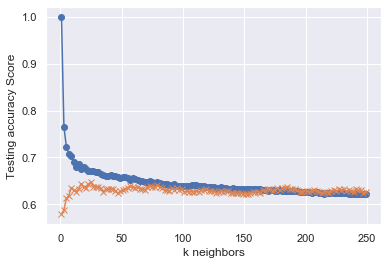

In [39]:
plt.plot(range(1, 250, 2), train_scores, marker='o')
plt.plot(range(1, 250, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
# Note that k: 25 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=25)
model = knn.fit(X_train_scaled, y_train)
print('k=25 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=25 Test Acc: 0.647


In [52]:
from sklearn.metrics import classification_report

# Check accuracy rate of the model in classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       270
           1       0.50      1.00      0.67       526
           2       0.00      0.00      0.00       253

    accuracy                           0.50      1049
   macro avg       0.17      0.33      0.22      1049
weighted avg       0.25      0.50      0.33      1049



C:\Users\marib\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Save the Model

In [53]:
filename = './KNN_model.sav'
joblib.dump(model, filename)

['./KNN_model.sav']